# Customer Churn Analysis Project - 7

### Problem Statement:

Churn rate ( sometimes called attrition rate), in its broadset sense,is a measure of the no. of individuals or items moving out of a collection group over a specific period. It is one of two primary factors that determine the steady state lavel of customers a business will support. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for ex. in businesses with a suscriber- based service model such as mobile telephone networks and pay TV operators. The term is also to refer to participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modelling, and can be part of a simulator used to measure return on marketing investment using marketing mix modelling.

#### In the dataset, the target variable is to predict the "Total Charges" paid by the customer.

The dataset contains the data of the customer. On the basis of data we have to predict the total charges by the customer. The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'


# Importing the Libraries & Dataset:

In [18]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Loading the dataset

df = pd.read_csv(r'C:\Users\govind\Desktop\Telecom_customer_churn.csv')

df #print the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
# Shape of data

df.shape

(7043, 21)

In [21]:
# Number of columns in dataset

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# Display of first 5 rows 

df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Checking for NULL values if any in the data frame

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We see that there are no null values in the column 

In [24]:
# Detail information of dataset

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Checking for Duplicate Values

df.drop_duplicates(inplace=True)

In [26]:
df.shape

(7043, 21)

We see no duplicate values so we can move on

In [27]:
# Check the datatypes of the columns 

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Observations after viewing the dataset:_

- we have 18 object columns in the dataset which we will need to treat and

- we see that the target or Label which is Churn is also having categorical data and needs to be treated  

- we see that from column 7 to 11 the columns specify the features the Customer has opted for in their plan and the rest shows the charateristic of customer , the payment is directly connected with the services and plan type

- we only see 3 numerical columns in the entire dataset-'SeniorCitizen','tenure' and 'MonthlyCharges
 

### Checking to see the unique values in the columns

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
 # we see there is object data in the float data and is practically a unique id given to each account
    
df['customerID'].nunique()

7043

In [30]:
#this is example of object data 

df['gender'].unique() 

array(['Female', 'Male'], dtype=object)

In [31]:
#this shows binary classification meaning 0 is no 1 is yes

df['SeniorCitizen'].unique() 

array([0, 1], dtype=int64)

In [32]:
#shows the classes in this column

df['Partner'].unique() 

array(['Yes', 'No'], dtype=object)

In [33]:
#this is whether the customer has dependents or not

df['Dependents'].unique() 

array(['No', 'Yes'], dtype=object)

In [34]:
#this is example of continuos data shows the tenure of each customer

df['tenure'].nunique() 

73

In [35]:
df['PhoneService'].unique()  

array(['No', 'Yes'], dtype=object)

In [36]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [37]:
 #this is example of object data 
    
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [38]:
 #this is example of object data 
    
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [40]:
df['DeviceProtection'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
df['TechSupport'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [42]:
df['StreamingTV'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df['StreamingMovies'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
#shows the contract type the customer has chosen

df['Contract'].unique() 

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
#shows if customer pays online or offline

df['PaperlessBilling'].unique() 

array(['Yes', 'No'], dtype=object)

In [46]:
df['PaymentMethod'].unique() #shows what mode of payment the customer uses

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [47]:
df['MonthlyCharges'].nunique() #shows no of unique values in the column

1585

In [48]:
df['TotalCharges'].nunique() #shows no of unique values in the column

6531

In [49]:
#shows whether customer is retained or they moved to other service providers and this is the target column

df['Churn'].unique() 

array(['No', 'Yes'], dtype=object)

### Let's check if there are whitespaces in the columns

In [50]:
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
df.loc[df['MonthlyCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


From above observations we can see that some columns have spaces or wide spaces as the value so the datatype is showing as object data

In [52]:
#Replacing the spaces in these columns with NULL values
df['TotalCharges'] =df['TotalCharges'].replace(" ",np.nan)

In [53]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we have replaced the spaces with null values 

In [54]:
df['TotalCharges'] =df['TotalCharges'].astype(float)

In [55]:
df.TotalCharges.dtype

dtype('float64')

Now we can see that the Total Charges column has been converted to float type , Now we can handle the null values 

In [56]:
#Handling the null values we are replacing it with the mean of the column. As the column is continuous in nature

np.mean([df['TotalCharges']])

nan

#Since the column has null values we are getting mean as nan

In [57]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [58]:
df['TotalCharges'] =df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [59]:
df.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

Now we see that the nan values have been replaced with the mean of the column

In [60]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So we also see the null values been removed from the dataset as well as the whitespaces

# EDA

### Visualization of the Data

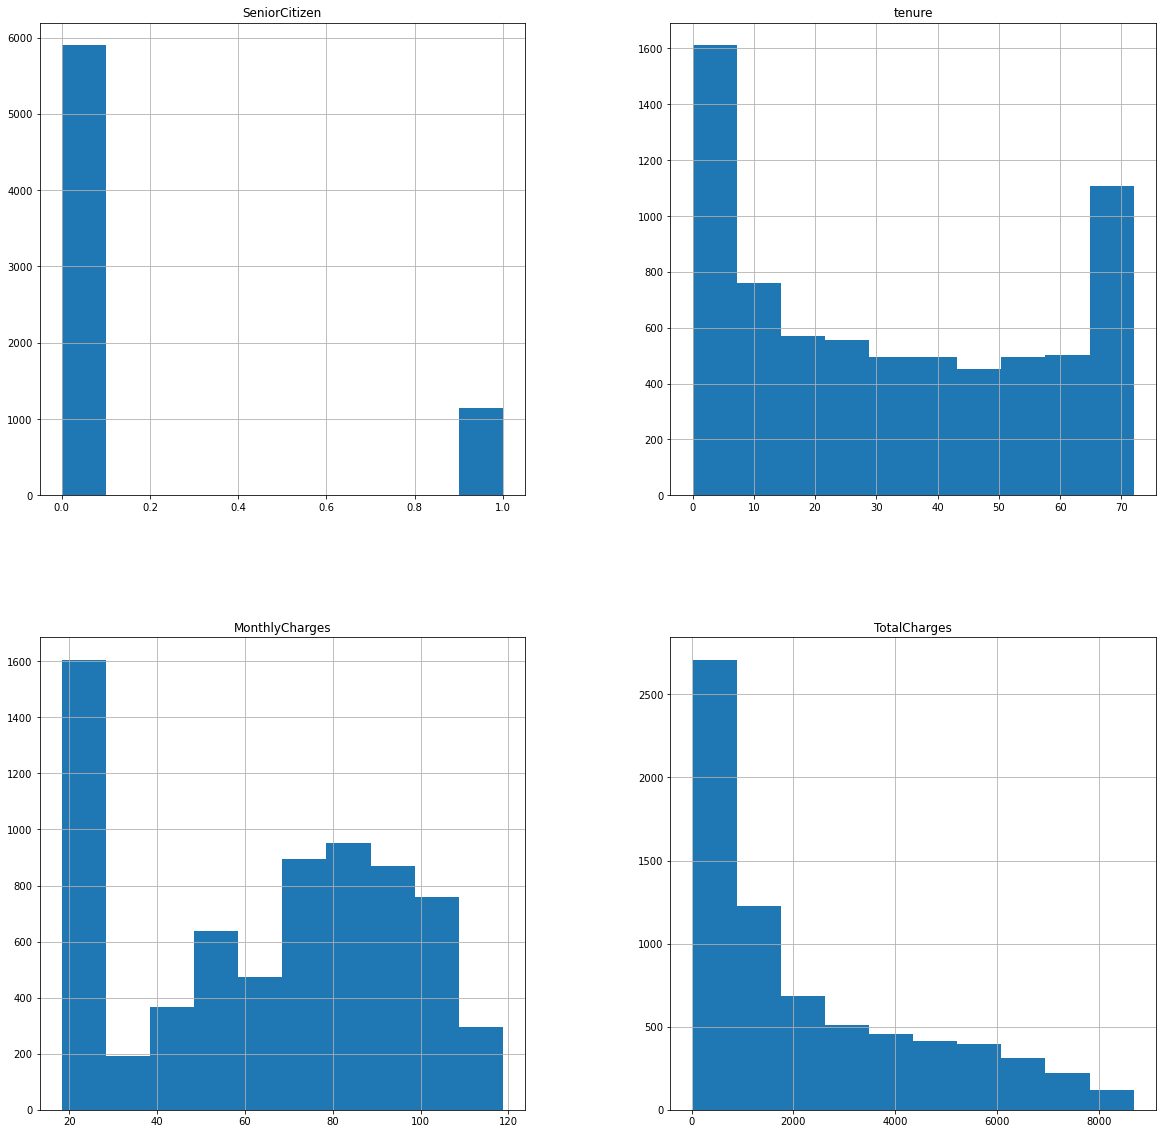

In [61]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,20))
plt.show()

WE see some skewness in the column TotalCharges and tenure and Monthly charges we see they are somewhat normally distributed

### Splitting the columns with categorical and numerica data

In [62]:
# We are defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [63]:
df_visualization_continuous=df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].copy()

In [64]:
df_visualization_nominal=df[['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

### Treating the target variable where  Yes = 0 and No = 1 

In [65]:
df['Churn'] = df['Churn'].factorize(['No', 'Yes' ])[0]

In [66]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


We have successfully replaced the categorical classes in the target variable with numerical variables

# Visualization of the Data

For the nominal categorical data we will use Countplot as it gives the frequency of the classes of the columns:

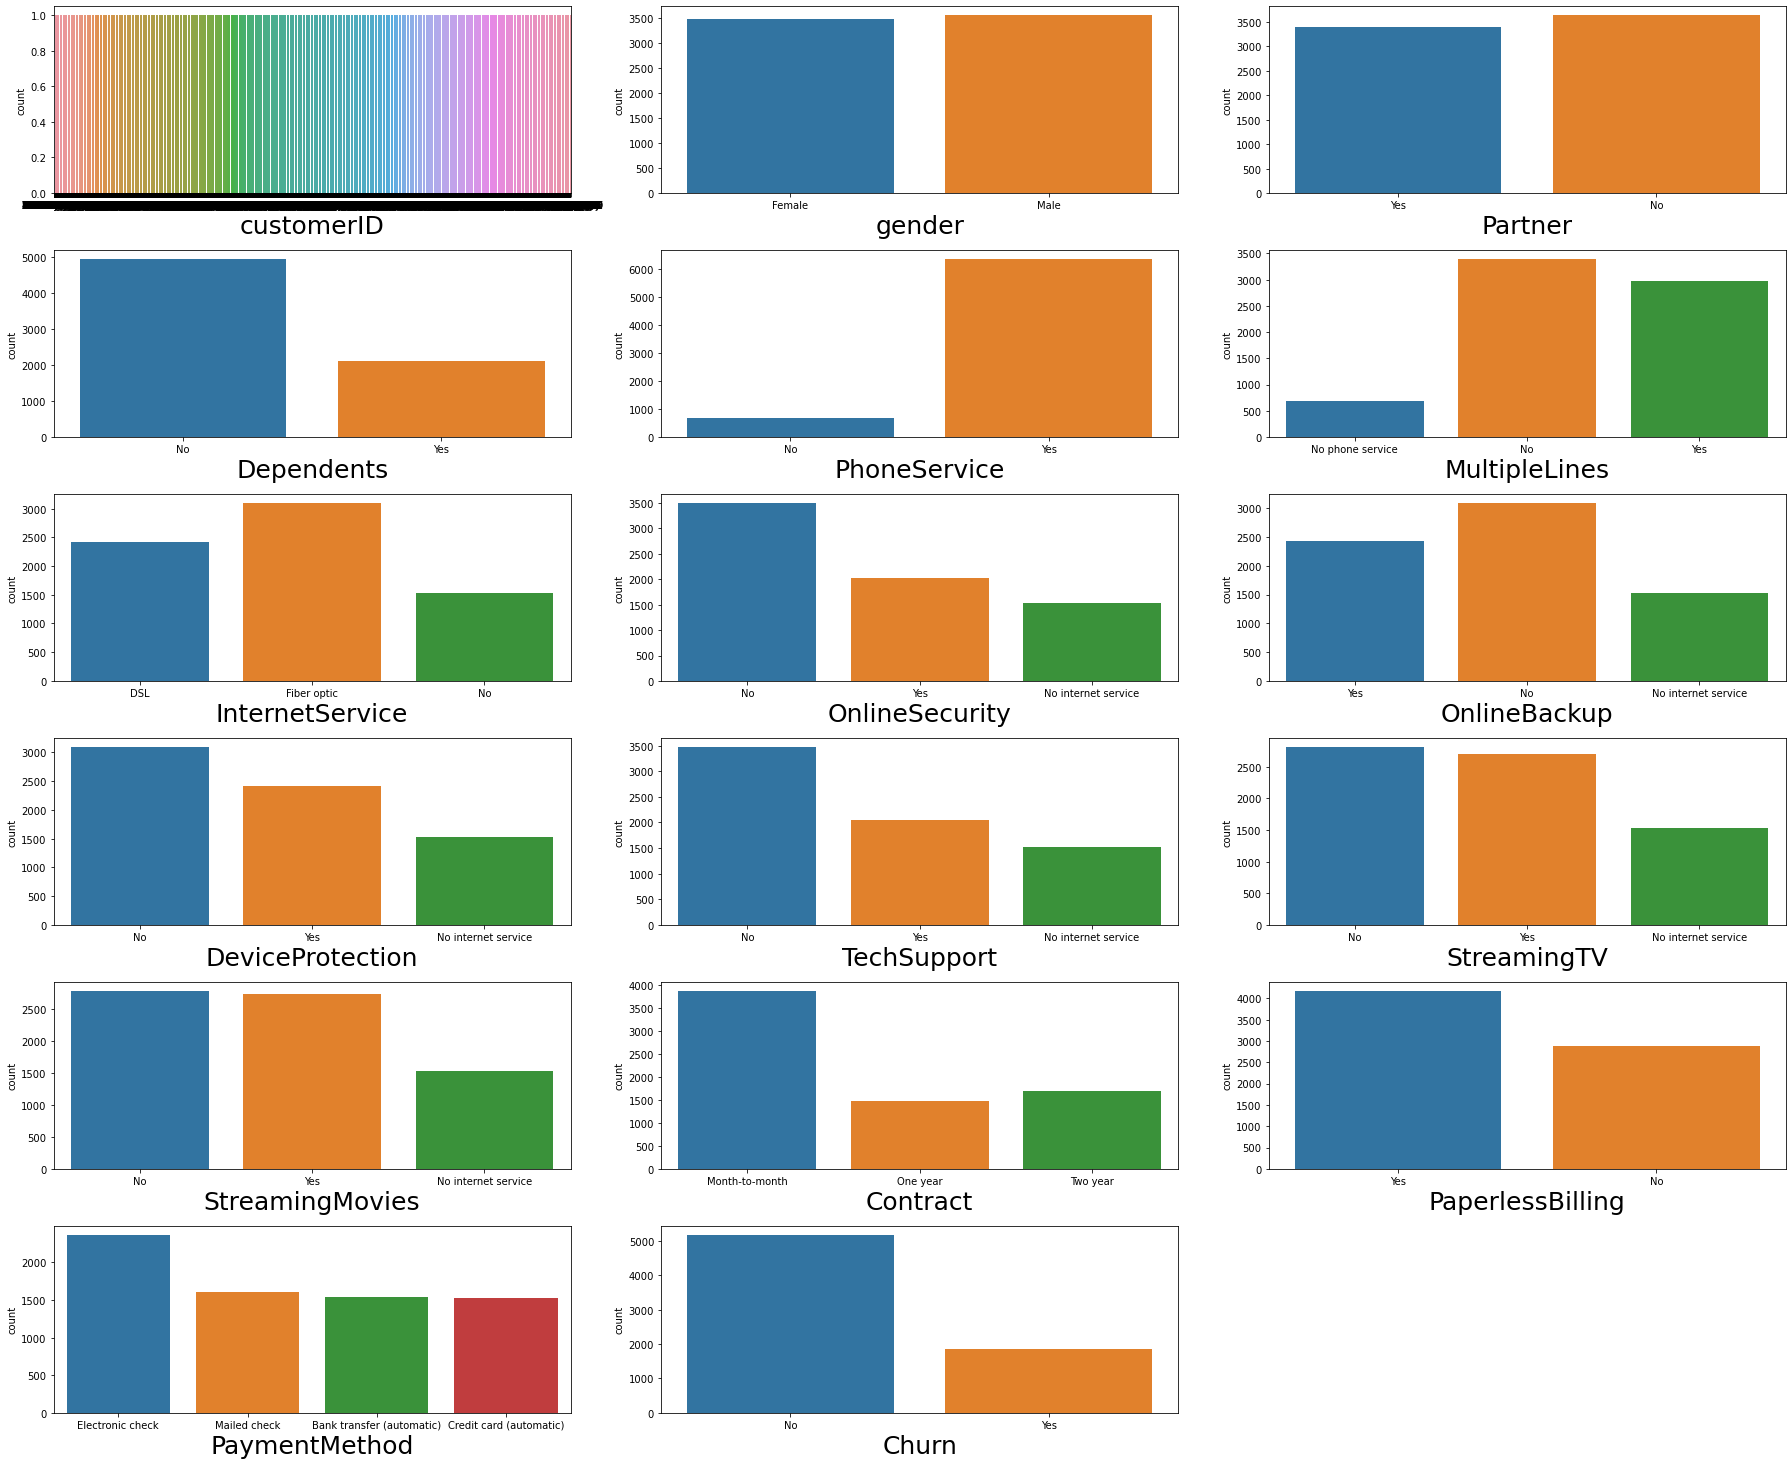

In [67]:
#Lets see how the data is distributed for every column as a whole

plt.figure(figsize =(25,30), facecolor = 'white')
plotnumber = 1

for column in df_visualization_nominal:
    if plotnumber <=17: # as there are 17 columns in data
        ax = plt.subplot(9,3,plotnumber)
        sns.countplot(df_visualization_nominal[column])
        plt.xlabel(column,fontsize = 25)
        
    plotnumber +=1
plt.tight_layout()

We see that we are not able to make a clear understanding of the columns with this so we will take the columns individually

Male      3555
Female    3488
Name: gender, dtype: int64


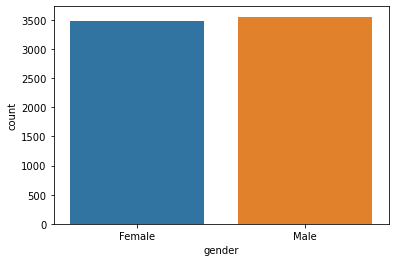

In [68]:
#Lets see the representation individually now with each column

ax = sns.countplot(x='gender',data = df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

From the above observations we can see the total number of male is 3555 and the number of females are 3488 which is really close

<AxesSubplot:xlabel='gender', ylabel='count'>

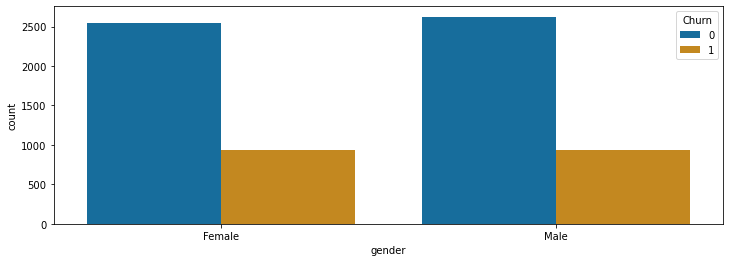

In [69]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="gender", hue="Churn", data=df, palette="colorblind")

We see that the percentage of churn in male and female is almost equal here

No     3641
Yes    3402
Name: Partner, dtype: int64


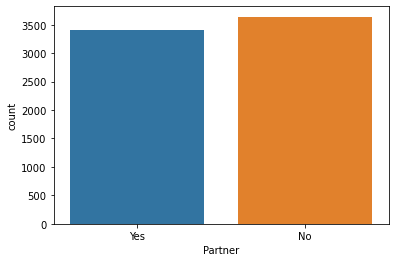

In [70]:
ax = sns.countplot(x='Partner',data = df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

We see almost equal distribution for the customers with partners and not

<AxesSubplot:xlabel='Partner', ylabel='count'>

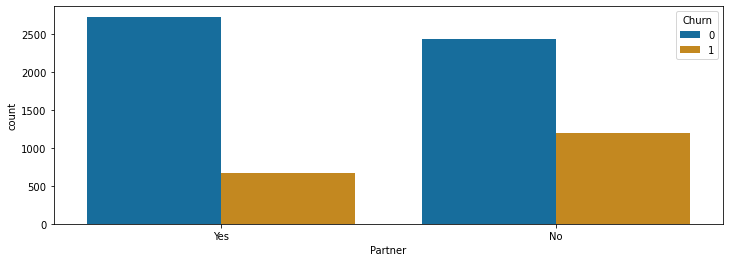

In [71]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Partner", hue="Churn", data=df, palette="colorblind")

WE see higher churn with people without partners at 64% approx

No     4933
Yes    2110
Name: Dependents, dtype: int64


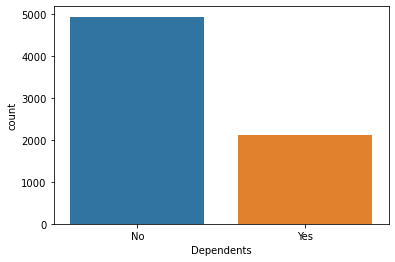

In [72]:
ax = sns.countplot(x='Dependents',data = df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

We see that the people without dependents are way more than the ones with 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

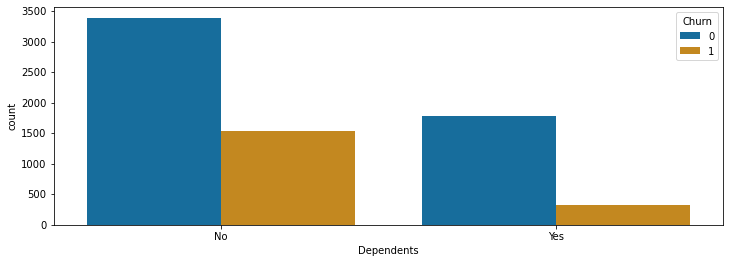

In [73]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Dependents", hue="Churn", data=df, palette="colorblind")

We see a much higher churn percentage from people who dont have dependents compared to the ones who do

Yes    6361
No      682
Name: PhoneService, dtype: int64


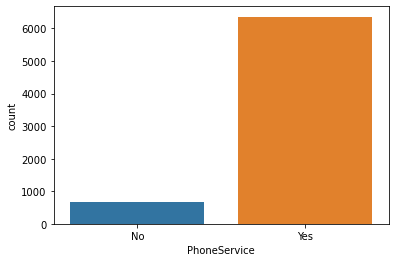

In [74]:
ax = sns.countplot(x='PhoneService',data = df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

We see that the majority of the customers are having phone service

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

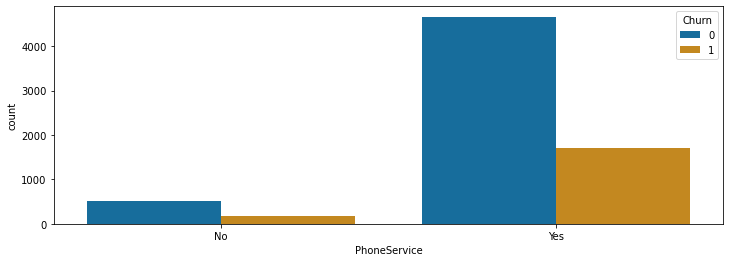

In [75]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="PhoneService", hue="Churn", data=df, palette="colorblind")

We see that the majority of the people are leaving from having phone service 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


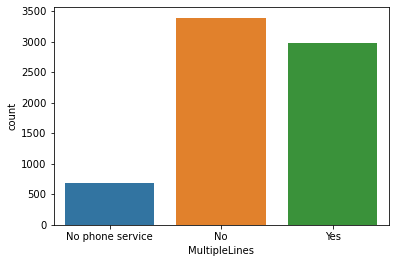

In [76]:
ax = sns.countplot(x='MultipleLines',data = df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

We see that there is almost equal numbers of people having multiple lines and not

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

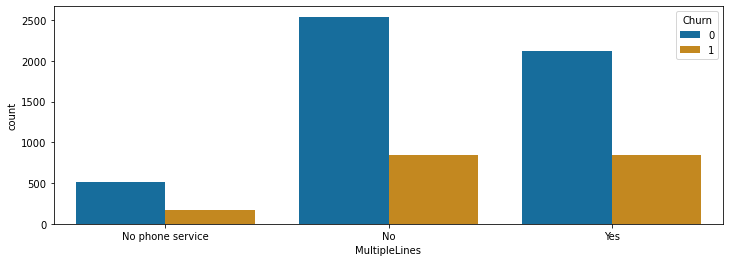

In [77]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="MultipleLines", hue="Churn", data=df, palette="colorblind")

We see there is equal churn in yes and no  for this add on feature and no phone service is the lowest

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


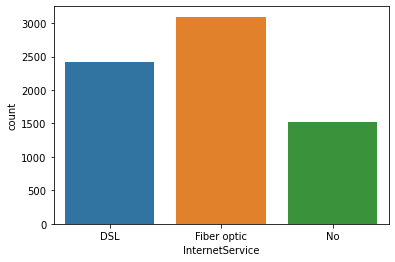

In [78]:
ax = sns.countplot(x='InternetService',data = df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

We see the majority are using fiber optic and the least is not using anything

<AxesSubplot:xlabel='InternetService', ylabel='count'>

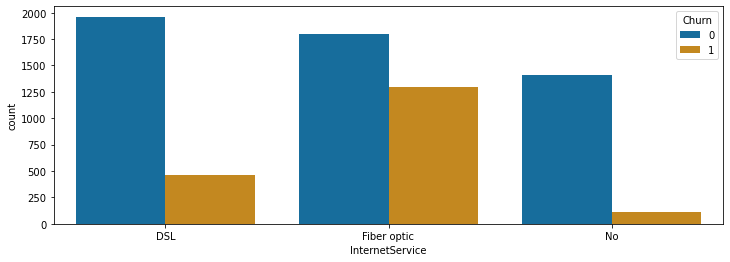

In [79]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="colorblind")

We see that most of the fiber optic users are moving out of this sp and we may assume the services offerred in other competitors is better

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


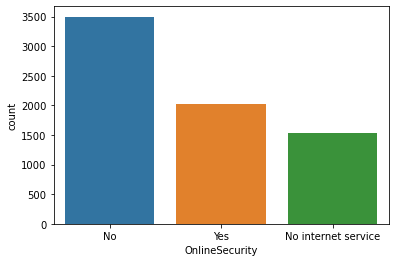

In [80]:
ax = sns.countplot(x='OnlineSecurity',data = df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

We see the majority of the users dont have online security,maybe they opt for other services

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

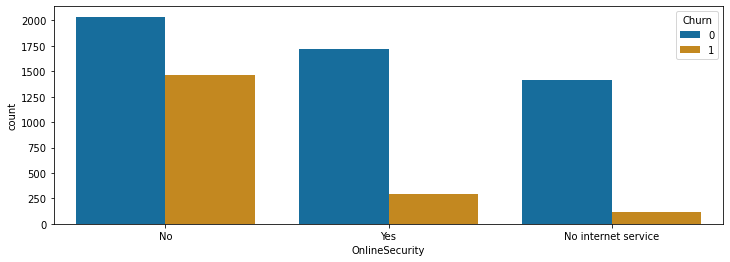

In [81]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, palette="colorblind")

We see that the majority of users not opted for online security are leaving

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


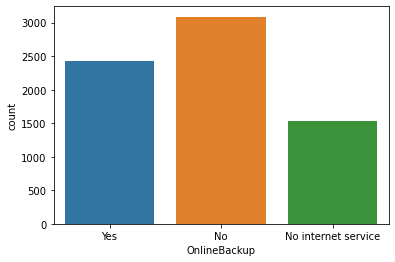

In [82]:
ax = sns.countplot(x='OnlineBackup',data = df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

We see an almost equal amount of people opting for onlinebackup and no online backup

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

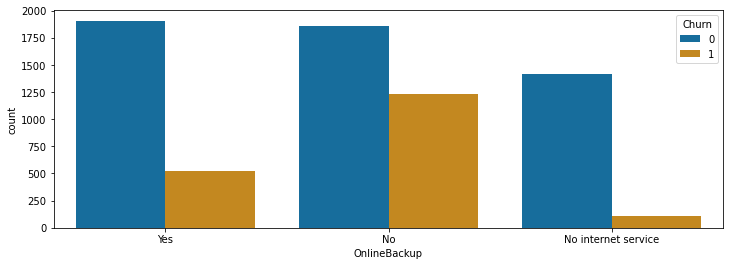

In [83]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="OnlineBackup", hue="Churn", data=df, palette="colorblind")

We see the majority of people leaving are not opting for this feature

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


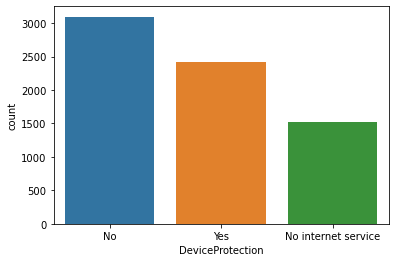

In [84]:
ax = sns.countplot(x='DeviceProtection',data = df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

We see that the majority are not opting for the feature but they are pretty close at 2422

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

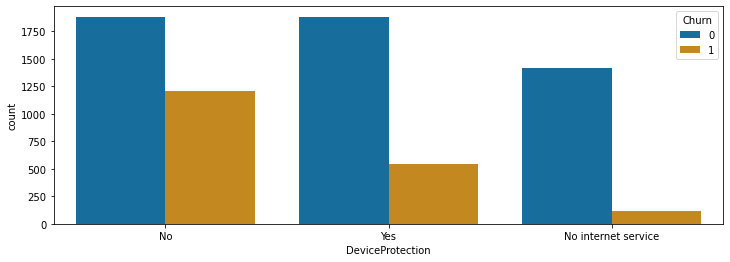

In [85]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="DeviceProtection", hue="Churn", data=df, palette="colorblind")

We see the majority of the customers who leave are not opting for device protection

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


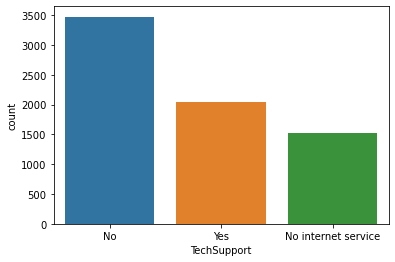

In [86]:
ax = sns.countplot(x='TechSupport',data = df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

We see the majority of them are not opting for tech support as most dont have the other add on

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

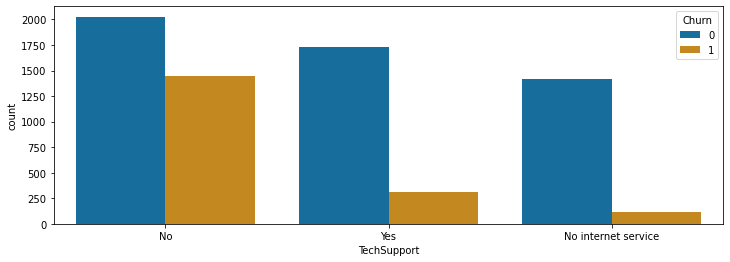

In [87]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="TechSupport", hue="Churn", data=df, palette="colorblind")

Same as the previous add ons majority who leave not using this feature

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


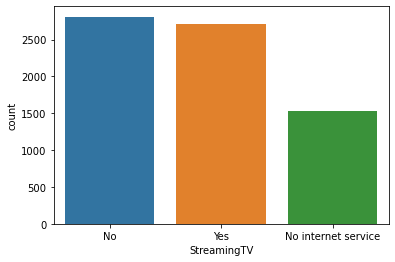

In [88]:
ax = sns.countplot(x='StreamingTV',data = df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

We see that there is close number of people opting and not for this feature

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

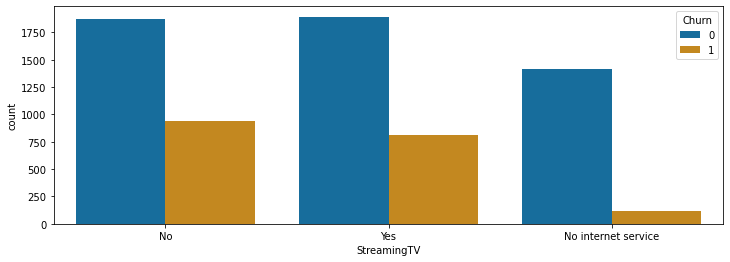

In [89]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="StreamingTV", hue="Churn", data=df, palette="colorblind")

As we see a close number of people opting and not , the churn is also equally spread and in 7 % higher that 
yes 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


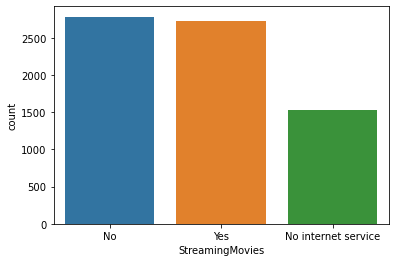

In [90]:
ax = sns.countplot(x='StreamingMovies',data = df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

just like tv we see a close no of people opting and not for this feature

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

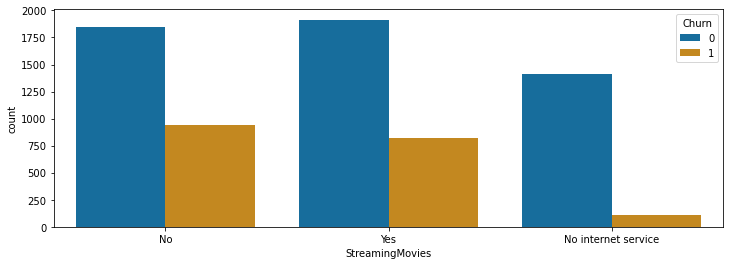

In [91]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="StreamingMovies", hue="Churn", data=df, palette="colorblind")

Again we see equal nof of people leaving in yes and o and only difference by 7% approx to no being the higher

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


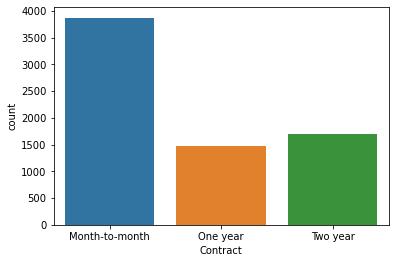

In [92]:
ax = sns.countplot(x='Contract',data = df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

We see the most of contract is paid month on month

<AxesSubplot:xlabel='Contract', ylabel='count'>

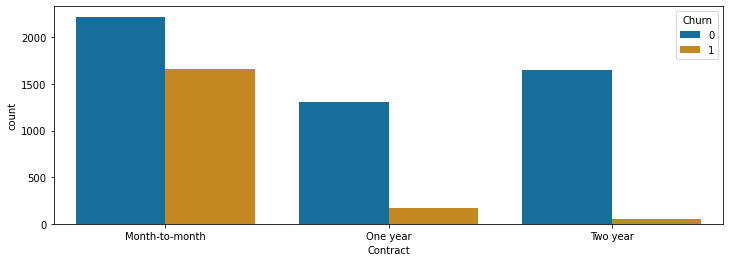

In [93]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="colorblind")

As we see that the month on month is highest we see the most churn there


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


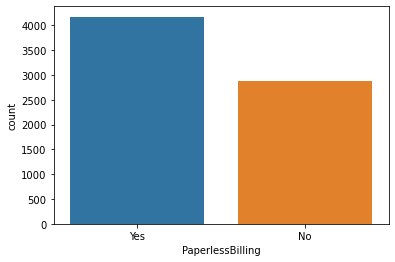

In [94]:
ax = sns.countplot(x='PaperlessBilling',data = df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

We see the majority of the customers pay online and paperless billing

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

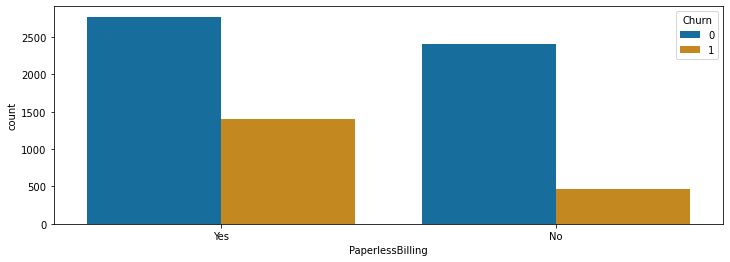

In [95]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="PaperlessBilling", hue="Churn", data=df, palette="colorblind")

We see that the majority of people leaving are in paperlessbilling

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


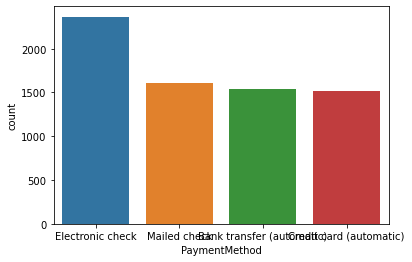

In [96]:
ax = sns.countplot(x='PaymentMethod',data = df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

We see the majority of them pay thru e-cheque and online

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

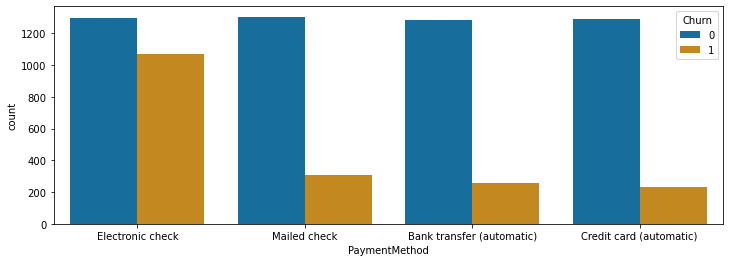

In [97]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="colorblind")

No     5174
Yes    1869
Name: Churn, dtype: int64


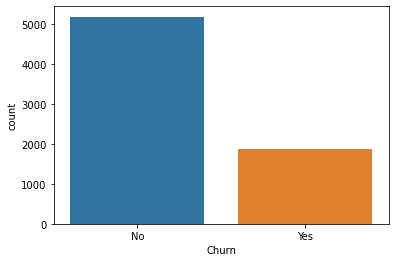

In [98]:
ax = sns.countplot(x='Churn',data = df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

In [99]:
import plotly.graph_objs as go
import plotly.offline as py
less_50 = df[(df['Churn'] != 0)]
more_50 = df[(df['Churn'] == 0)]

trace = go.Pie(labels = ['Churn is No', 'Churn is Yes'], values = df['Churn'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['gray','yellow'], 
               line=dict(color='black', width=1.5)))
layout = dict(title =  'Distribution of Loan_Status variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Observations from Target variable:

    - we see that the classes are highly imbalanced at 73.5% and 26.5% which will make a biased model
    
    - we see that the no of people leaving the Provider is low so its good for the company
    
    - we need to treat the imbalanced dataset before model building as the model will become biased

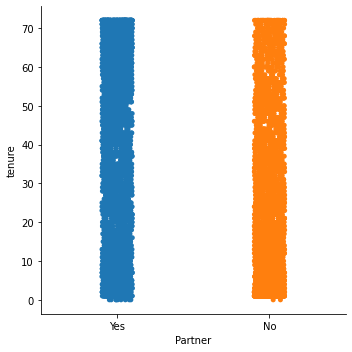

In [100]:
sns.catplot(x='Partner',y='tenure', data=df)

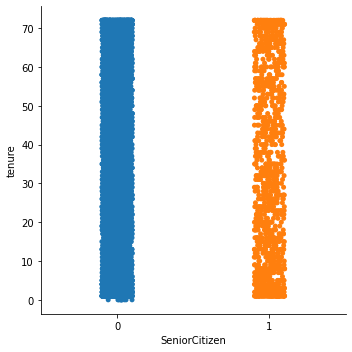

In [101]:
sns.catplot(x='SeniorCitizen',y='tenure', data=df)

### Checking the distribution of the continuous value of the float columns.

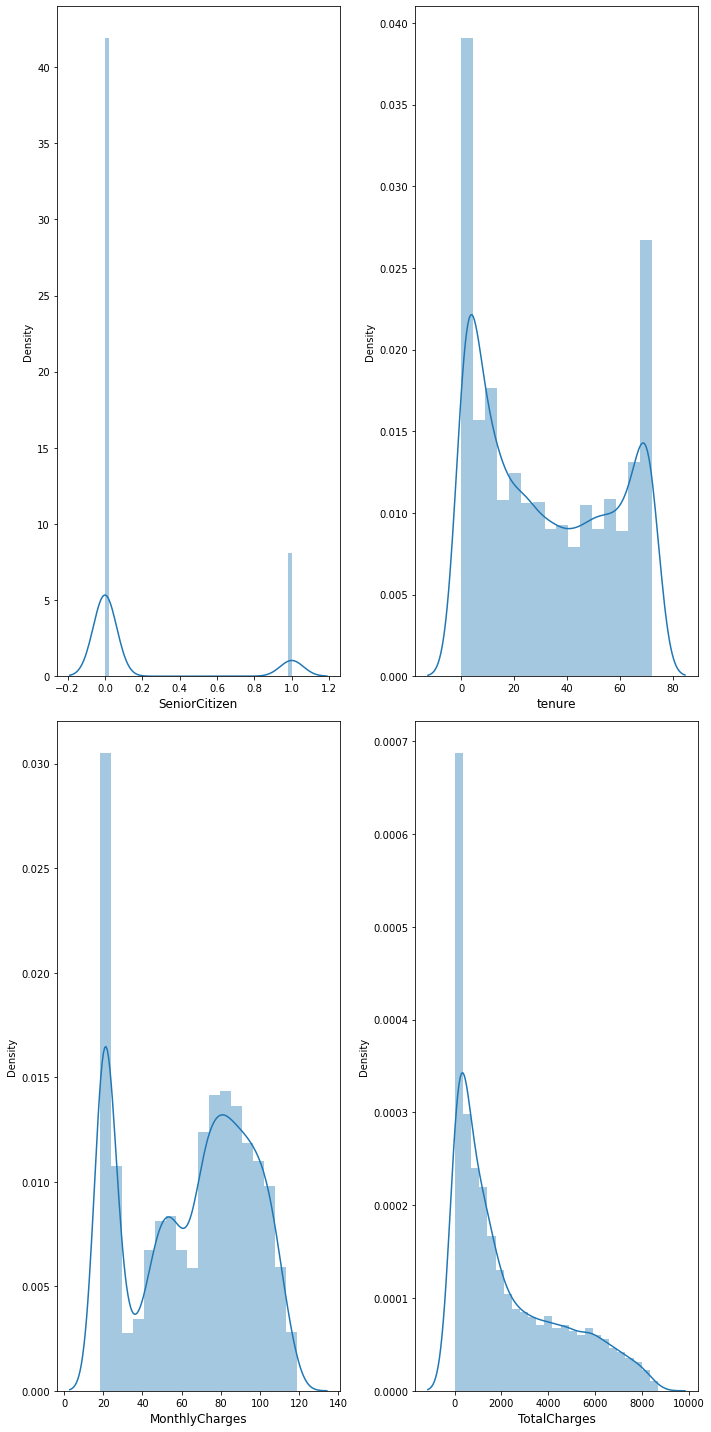

In [102]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(10,20), facecolor = 'white')
plotnumber = 1

for column in df_visualization_continuous:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_visualization_continuous[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

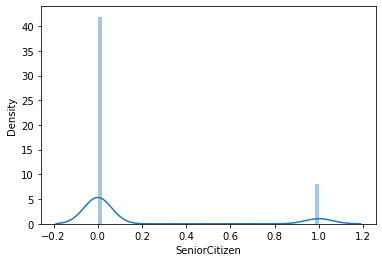

In [103]:
sns.distplot(df_visualization_continuous['SeniorCitizen'],kde=True)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


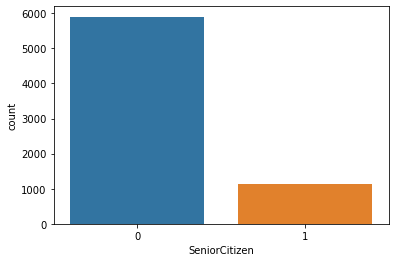

In [104]:
ax = sns.countplot(x='SeniorCitizen',data = df_visualization_continuous)
print(df_visualization_continuous['SeniorCitizen'].value_counts())

From the above observations we can see the total number of younger customers are 5901 and the number of senior citizens  are 1142

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

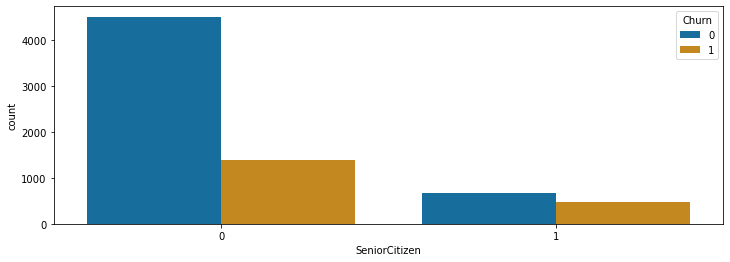

In [105]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette="colorblind")

We see that the majority of churn as yes is seen in non senior citizens

<AxesSubplot:xlabel='tenure', ylabel='Density'>

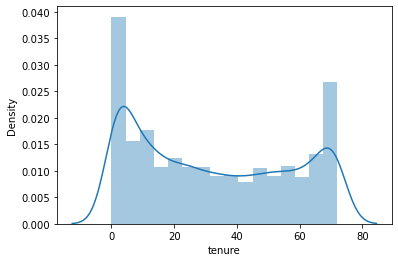

In [106]:
sns.distplot(df_visualization_continuous['tenure'],kde=True)

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


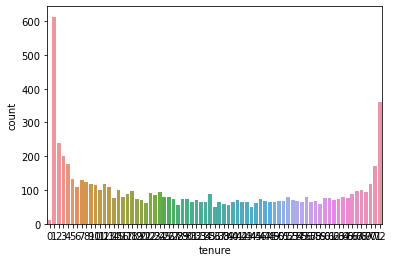

In [107]:
ax = sns.countplot(x='tenure',data = df_visualization_continuous)
print(df_visualization_continuous['tenure'].value_counts())

We see that people have highest tenure in 1 month and second highest is 72 at the extreme end which shows a high floating customer base as well as a high settled customer base

<AxesSubplot:xlabel='tenure', ylabel='count'>

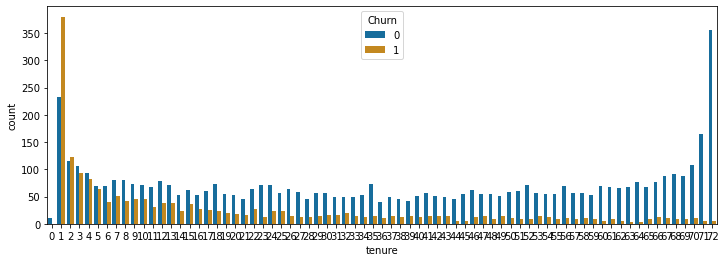

In [108]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="tenure", hue="Churn", data=df, palette="colorblind")

In [109]:
import plotly.express as px
plot_df=df.sort_values(by="Churn")
fig=px.histogram(plot_df, x='tenure', color='Churn', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'No': '#B9C0C9','Yes': '#CDBBA7'})
fig.update_layout(title_text='Distribution of tenure by Churn Status',
                  xaxis_title='tenure, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

We see that people with less tenurity are the highest to leave the company and as the tenure increases less and less people are leaving

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

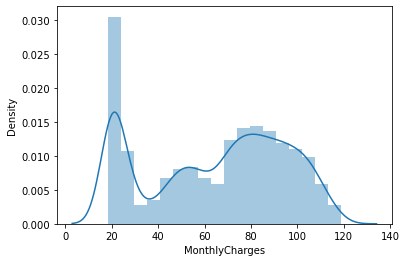

In [110]:
sns.distplot(df_visualization_continuous['MonthlyCharges'],kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

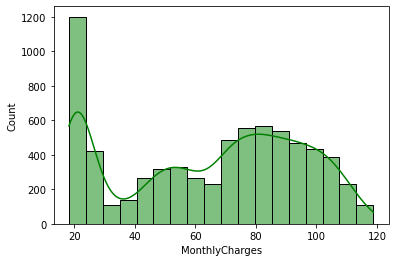

In [111]:
sns.histplot(x=df.MonthlyCharges, ec = "black", color='g', kde=True)

We see that majority of the customer are in range 20 to 24 approx per month and we see second highest are betweem 70 to 100 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

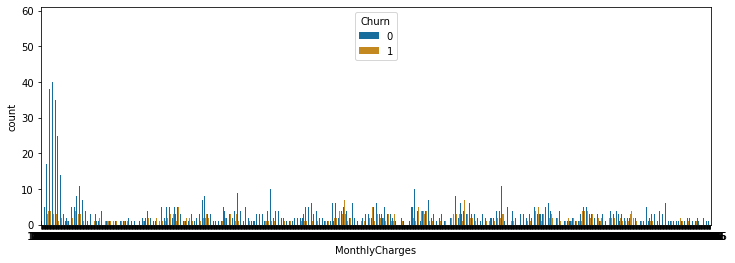

In [112]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="MonthlyCharges", hue="Churn", data=df, palette="colorblind")

We see that the people paying lesser are not leaving the provider while the higher paying ones are seen to leave more

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

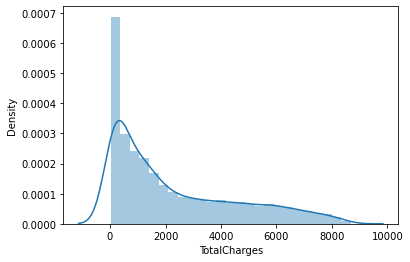

In [113]:
sns.distplot(df_visualization_continuous['TotalCharges'],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

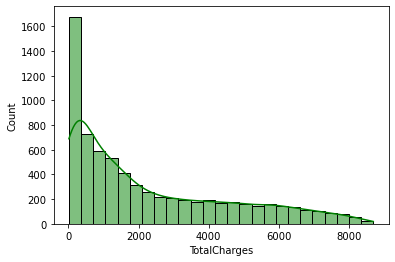

In [114]:
sns.histplot(x=df.TotalCharges, ec = "black", color='g', kde=True)

We see that the majority of the customers are range 0 to 500 approx , we are seeing that the majority in last monthly was 20 to 40 so we are seeing similar trend here as well 

<AxesSubplot:xlabel='TotalCharges', ylabel='count'>

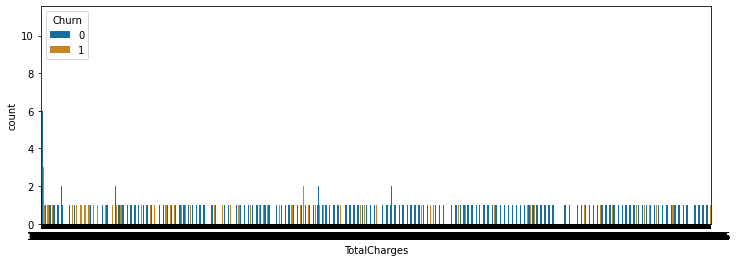

In [115]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x="TotalCharges", hue="Churn", data=df, palette="colorblind")

As we see the majority of users in the lower amount are leving more than the higher amount , we see a very relatable  correlation with tenure , monthly charges as wella s total charges 

In [116]:
# Comparing the type of payment with monthly charges

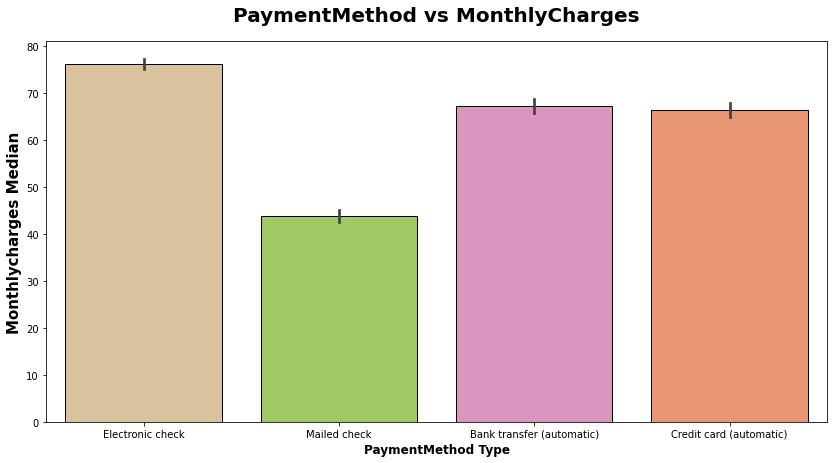

In [117]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.PaymentMethod, y=df.MonthlyCharges, ec = "black", palette="Set2_r")
plt.title("PaymentMethod vs MonthlyCharges", weight="bold",fontsize=20, pad=20)
plt.ylabel("Monthlycharges Median", weight="bold", fontsize=15)
plt.xlabel("PaymentMethod Type", weight="bold", fontsize=12)
plt.show()

Wer see here that apart from mailed check the customers are paying the highest in E-cheque and somewhat closer are the rest , bank transfer and Credit card 

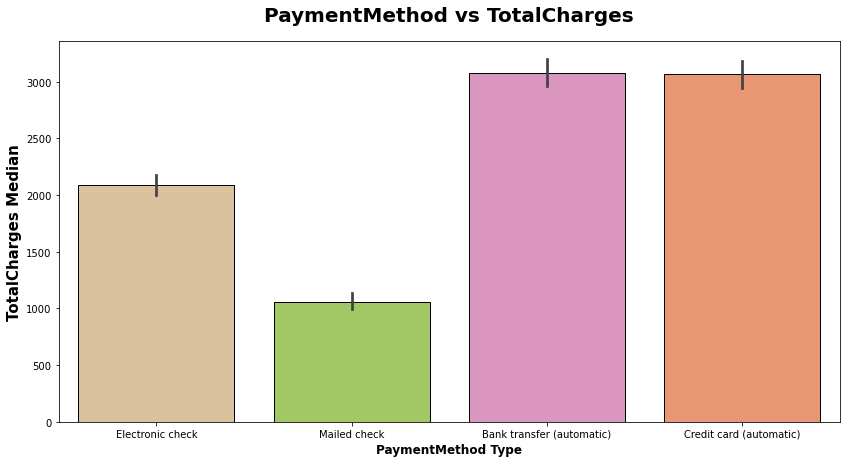

In [118]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.PaymentMethod, y=df.TotalCharges, ec = "black", palette="Set2_r")
plt.title("PaymentMethod vs TotalCharges", weight="bold",fontsize=20, pad=20)
plt.ylabel("TotalCharges Median", weight="bold", fontsize=15)
plt.xlabel("PaymentMethod Type", weight="bold", fontsize=12)
plt.show()

In total charges we see that the highest are bank transfer and credit card and e- cheque is much lower

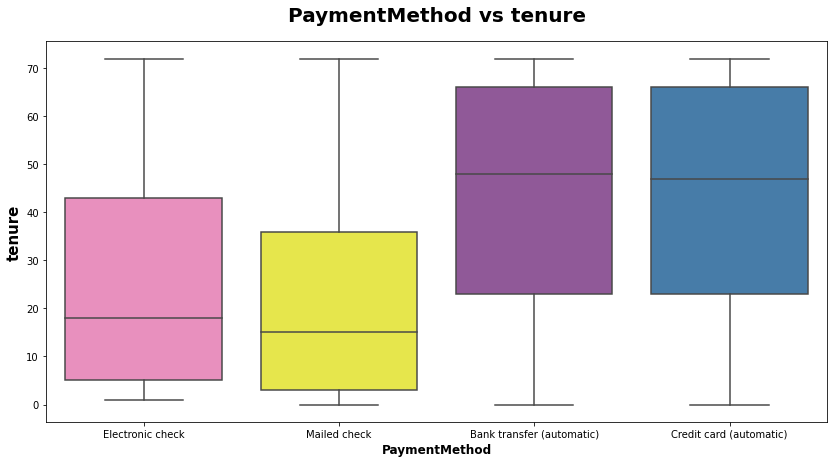

In [119]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='PaymentMethod', y='tenure', data=df,palette="Set1_r")
plt.title("PaymentMethod vs tenure", weight="bold",fontsize=20, pad=20)
plt.ylabel("tenure", weight="bold", fontsize=15)
plt.xlabel("PaymentMethod", weight="bold", fontsize=12)
plt.show()

Here as well we see that the higher tenure customers are opting for bank transfer as well as credit card

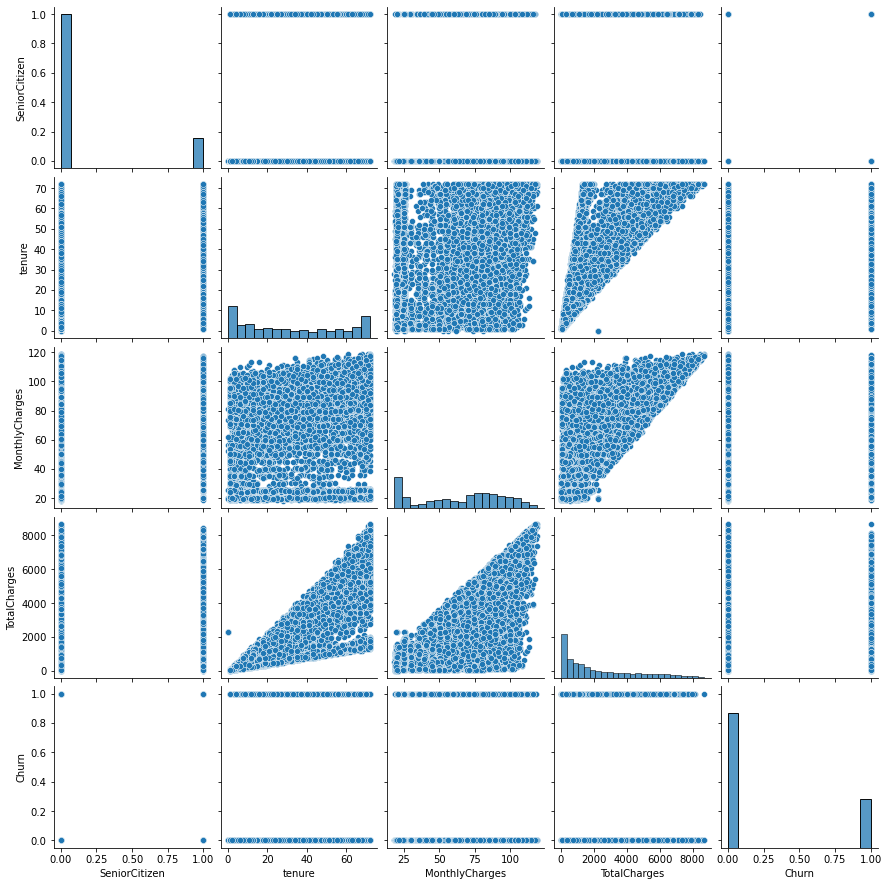

In [120]:
sns.pairplot(df)

We can see some correlation between tenure monthly charges as well as total charges , we need to study further to make an assumption.as this pairplot is not showing it clearly 

# Since the dataset has a lot of string values. We will use encoding techniques to convert the string data to numerical data 

# Encoding the DataFrame

In [121]:
from sklearn.preprocessing import OrdinalEncoder

In [122]:
enc=OrdinalEncoder()

In [123]:
for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [124]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


In [125]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

### Visualizing the relationship between the features and the  target variable - Churn

In [126]:
#Split data into features and label

x = df.drop(columns = ['Churn'])
y = df['Churn']

In [127]:
x.shape

(7043, 20)

### Scatter plot

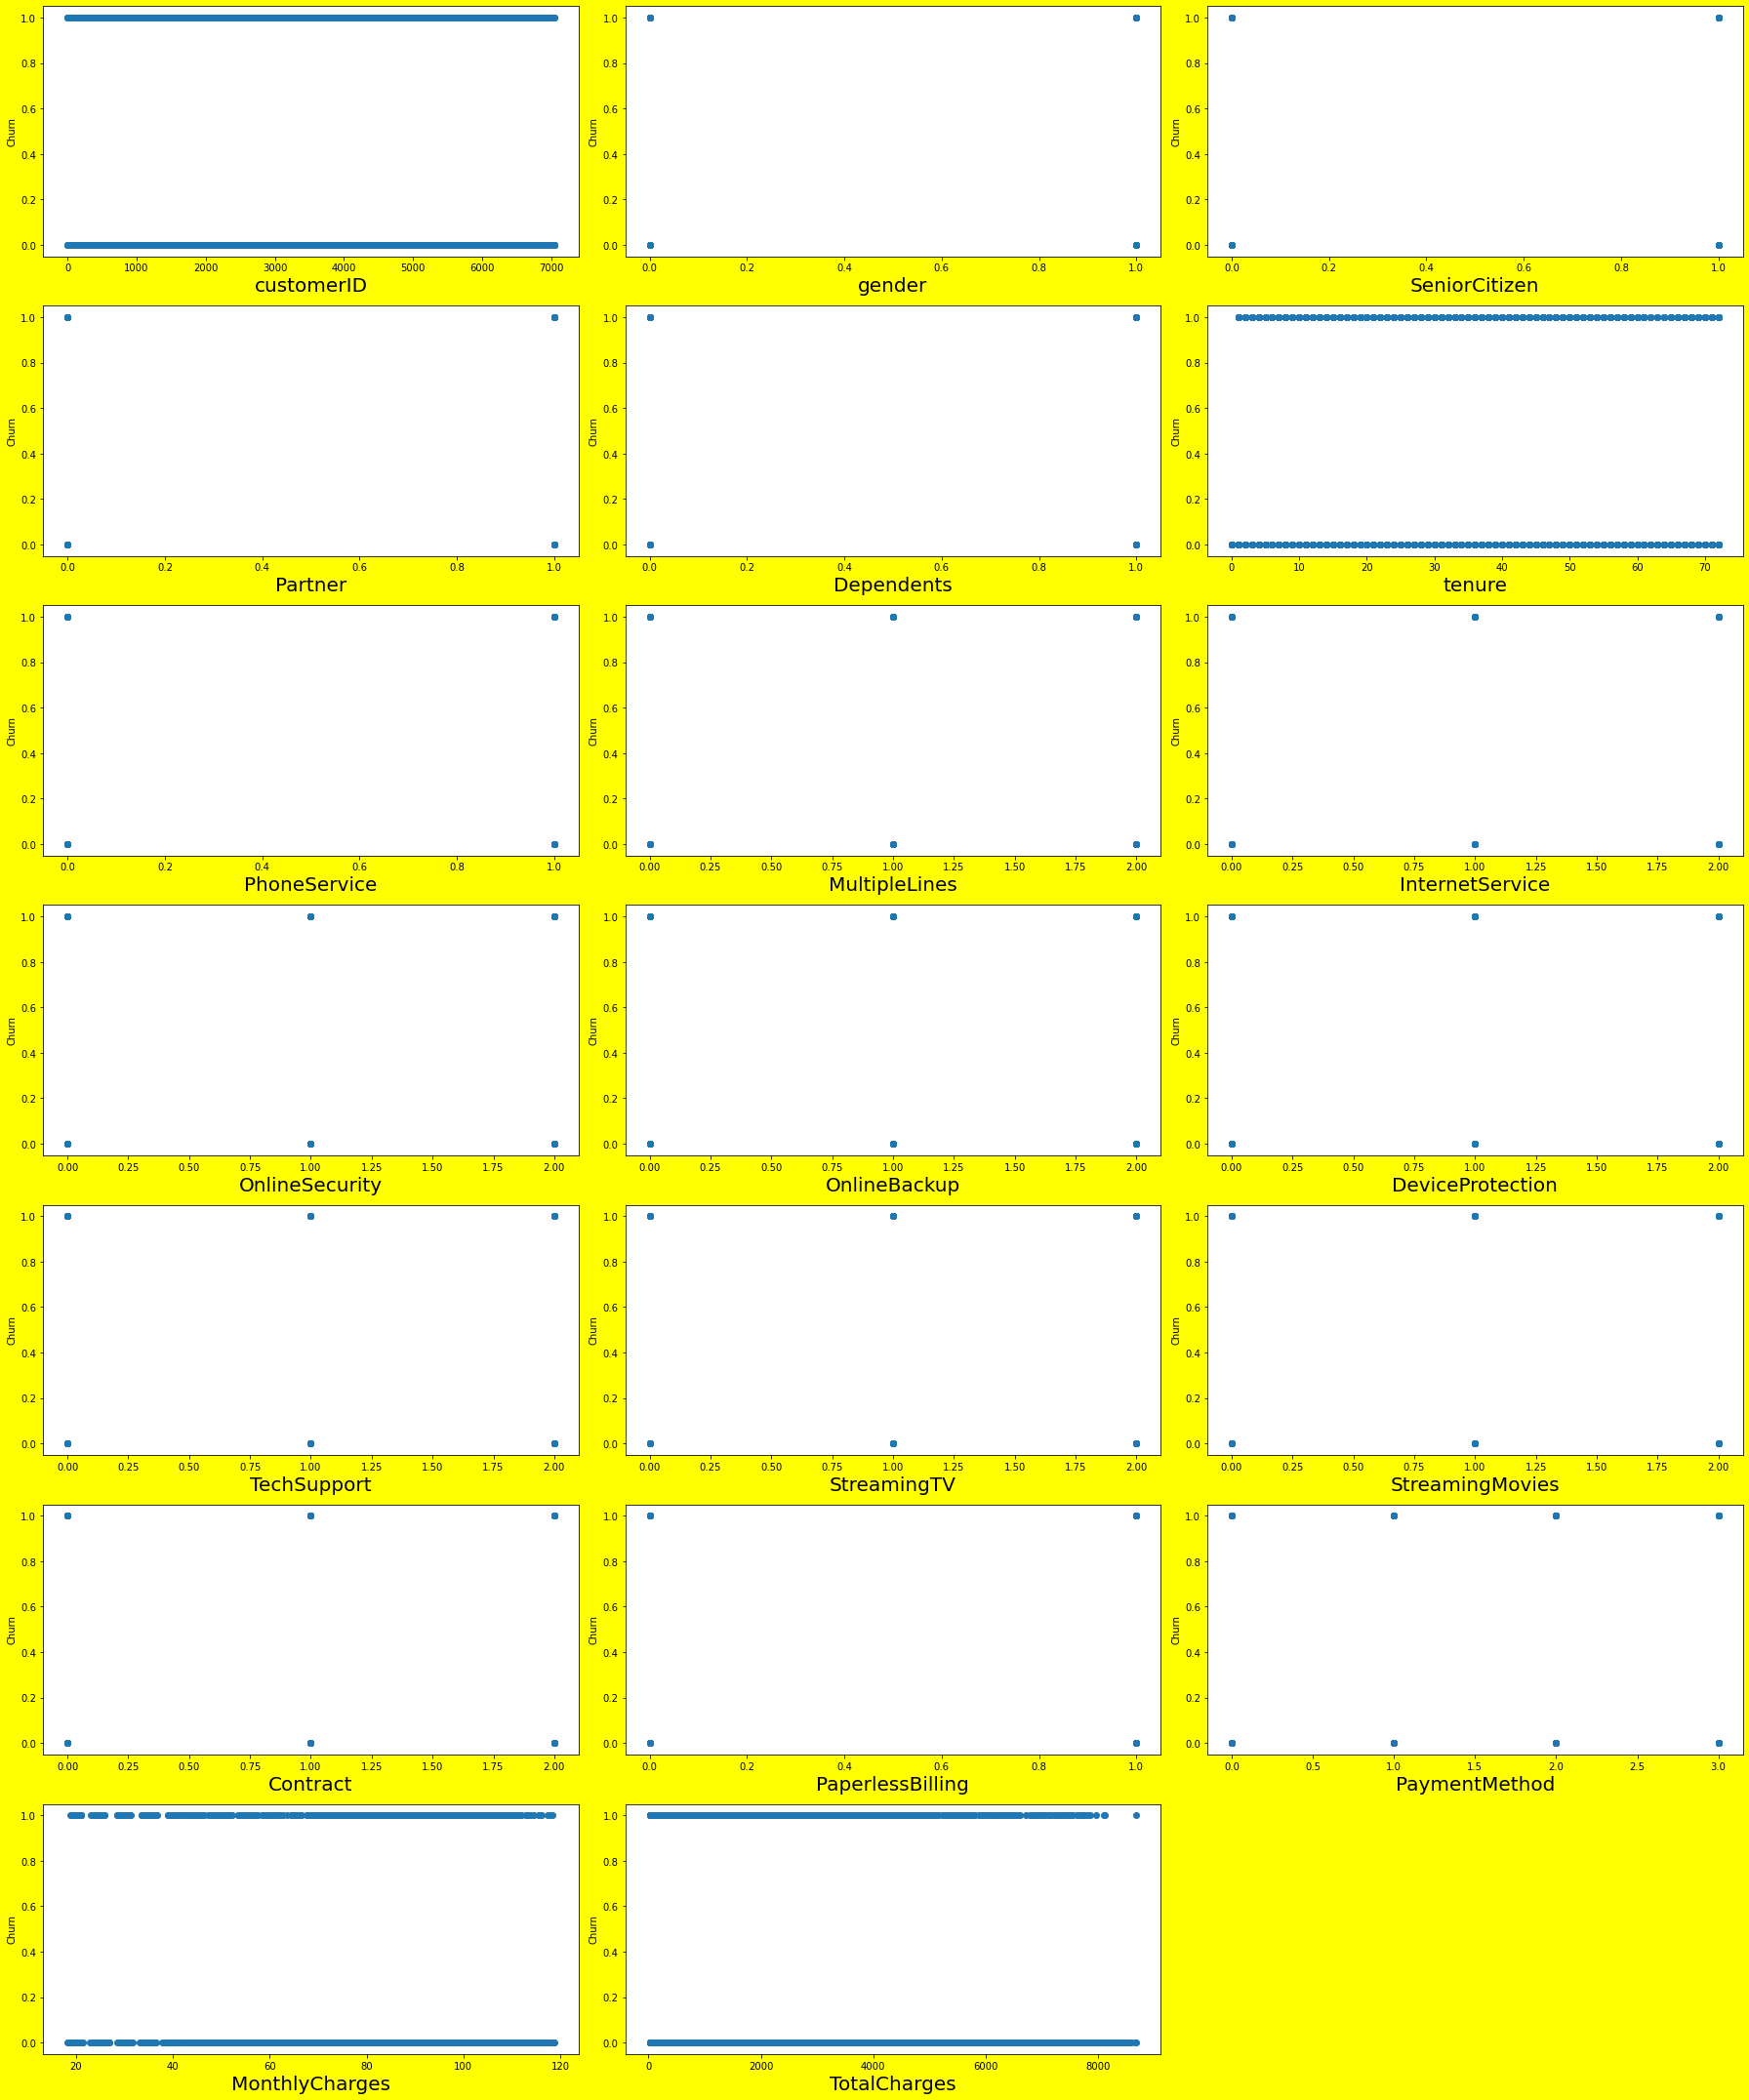

In [128]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=20:
        ax = plt.subplot(7,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Churn',fontsize = 10)
    plotnumber +=1
plt.tight_layout()


We see that this is not the right graph to represent this as we have binary classification here

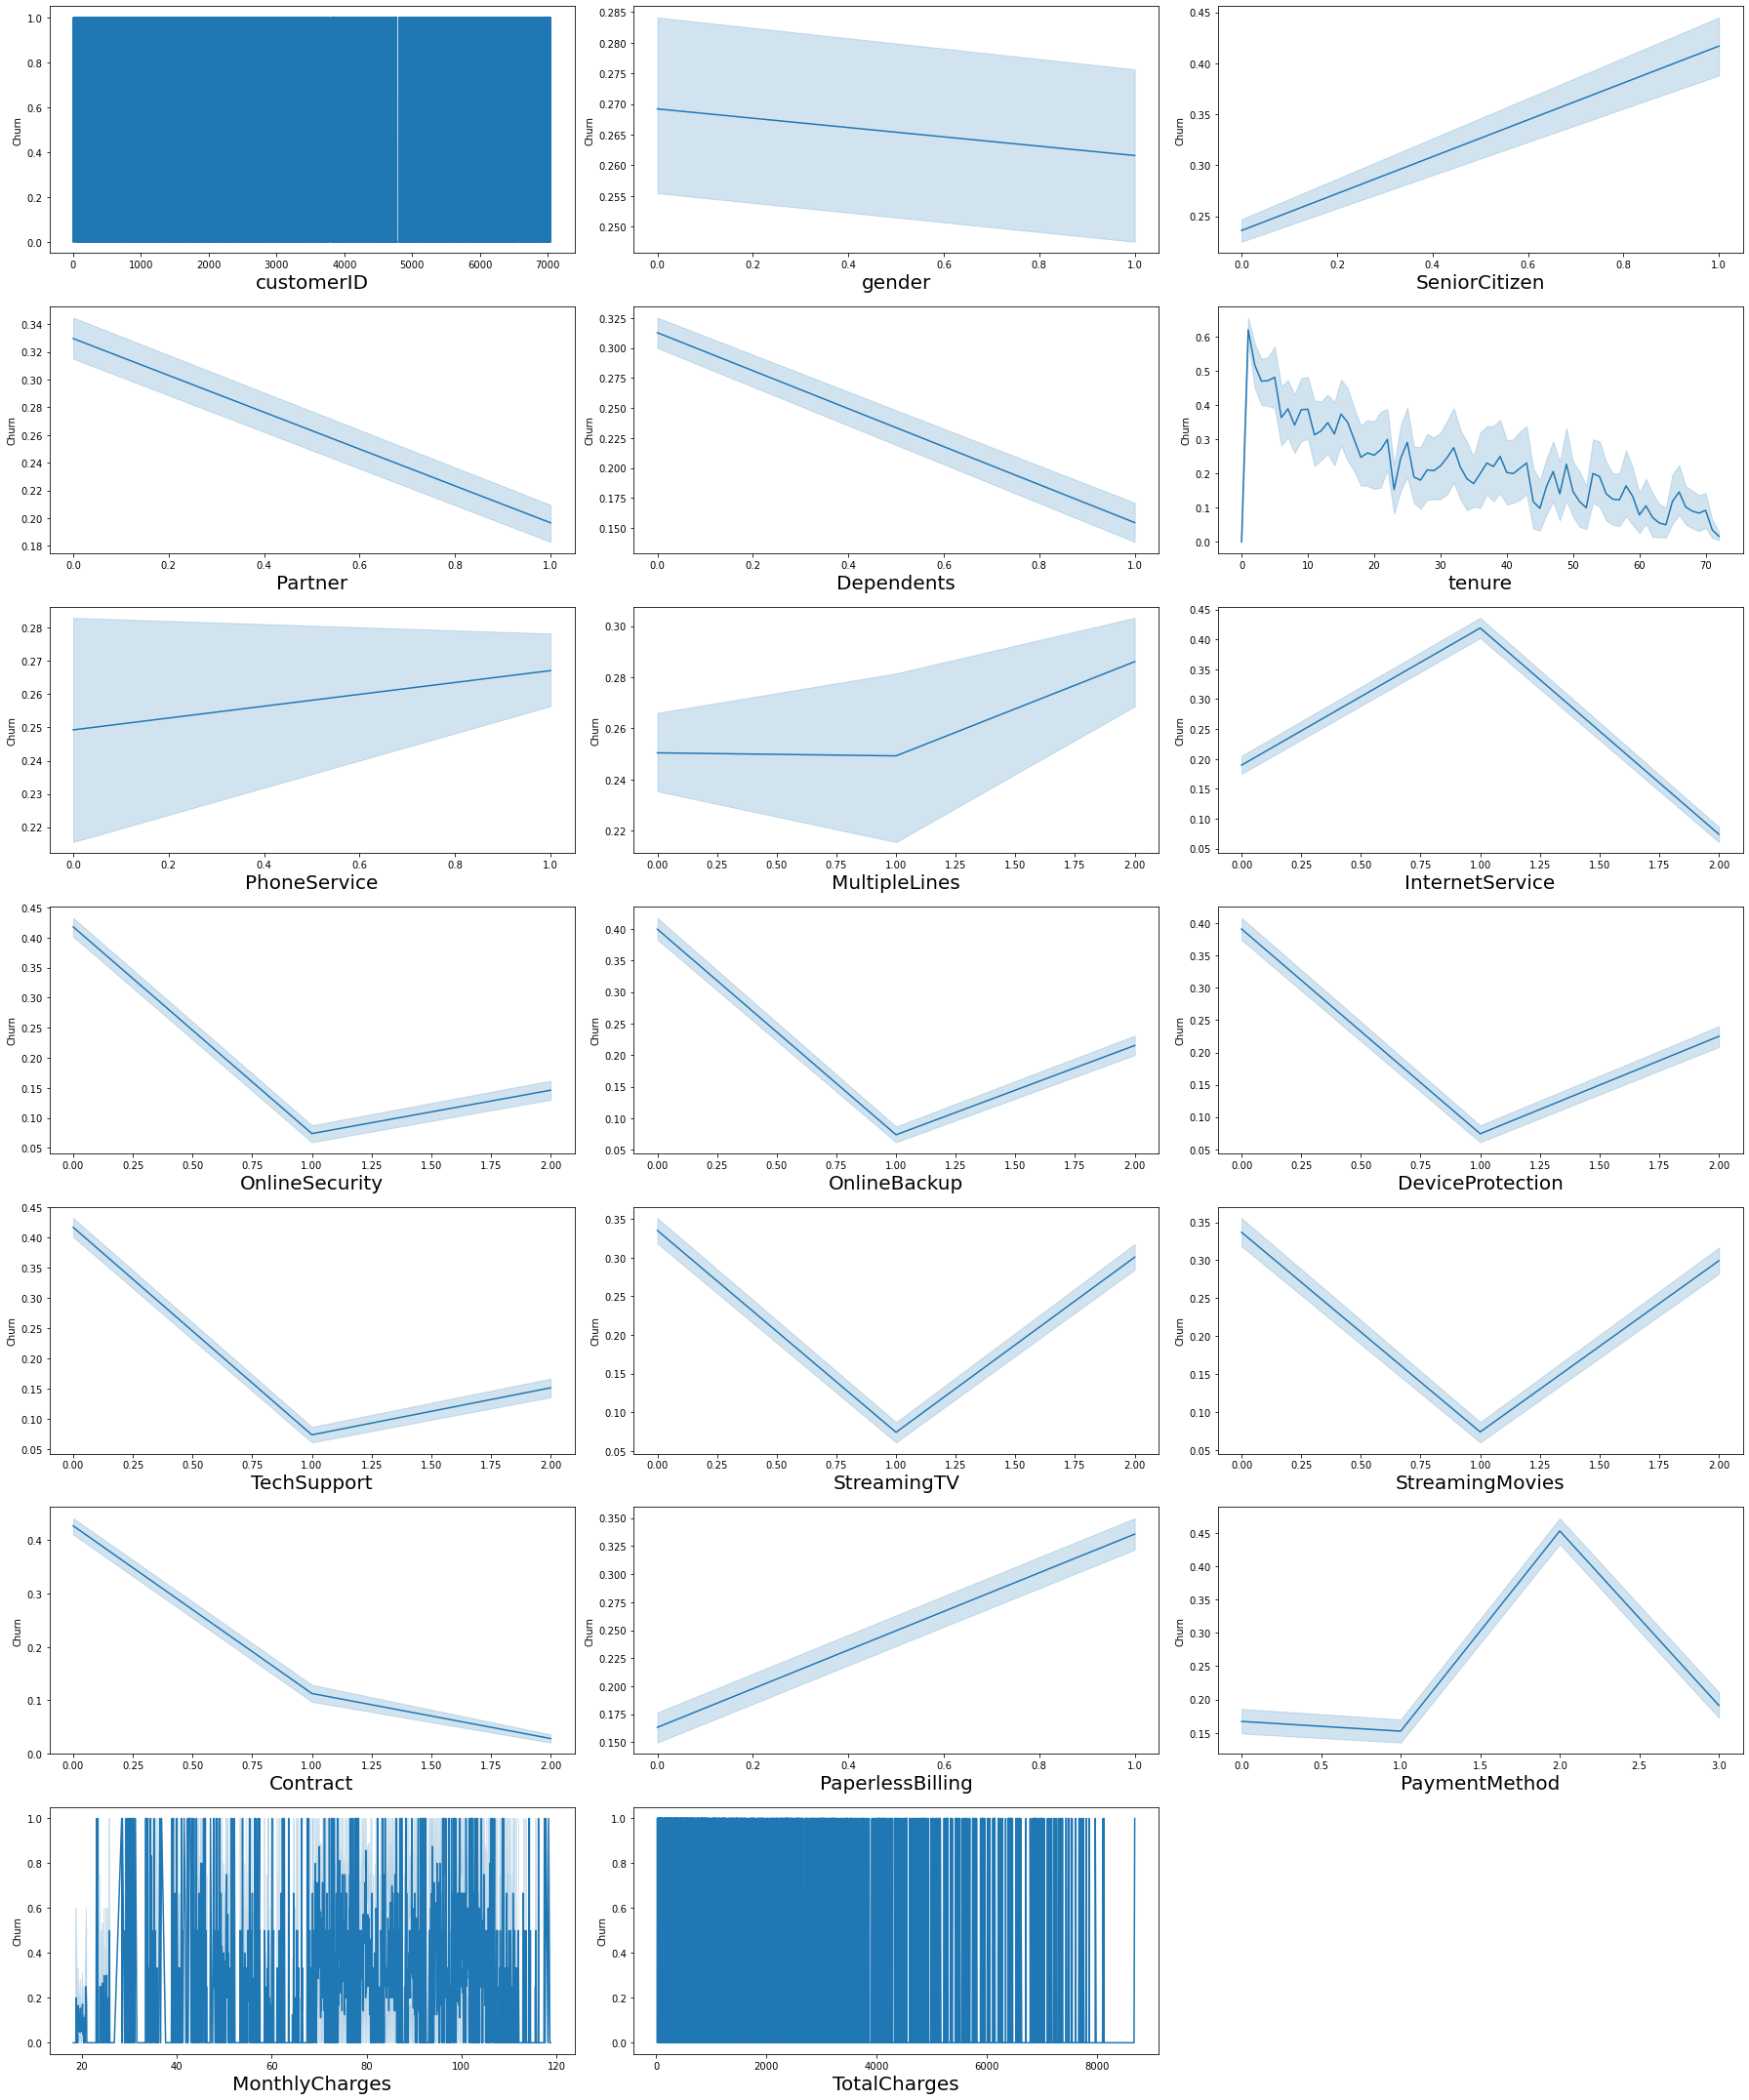

In [129]:
#Lets see how the data is distributed for every column as a whole

#Visualizing Relationship

plt.figure(figsize =(25,30), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber <=20:
        ax = plt.subplot(7,3,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Churn',fontsize = 10)
    plotnumber +=1
plt.tight_layout()

Here we see a better graph which can show the relationship somewhat of the colums, we see that the columns online security , online backup, device protection are all having similar relationship with the target 

we see that monthly charges and totla charges is all over the place and as they are ordinal data we are not able to see a pattern

we cannot assume with this graph that the features which are going to influence the model for target so we will use other methods

# Describe the Dataset

In [130]:
#only continuous columns
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

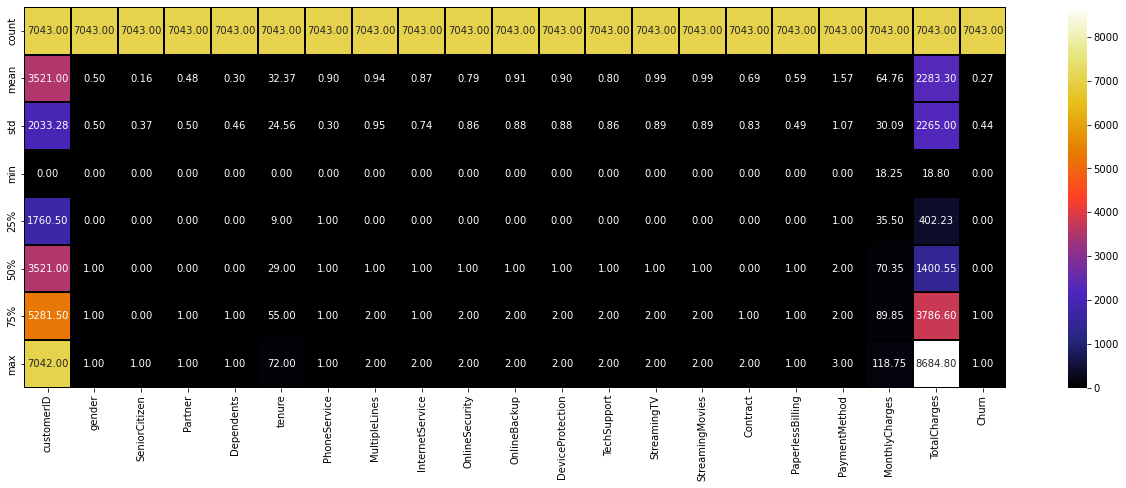

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),cmap="CMRmap",annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

## Observations :
    
    - we see that the customer id needs to be removed as its only an index of the users or customers but due to the size of the value the model may become biased due to it 
    
    - we see that Total charges has a few outliers which we will need to treat , we also see that the mean ans STd are very close which is not good and we need to have a huge variation to have a normal distribution 
    
    - we see some outliers in monthly charges as well as tenure , so we need to treat them as well 

# Correlation of the columns with the target Columns

In [132]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

We see that the columns Monthly charges has the highest impact on the churn as well as paperless billing, the lowest is Contract

<AxesSubplot:>

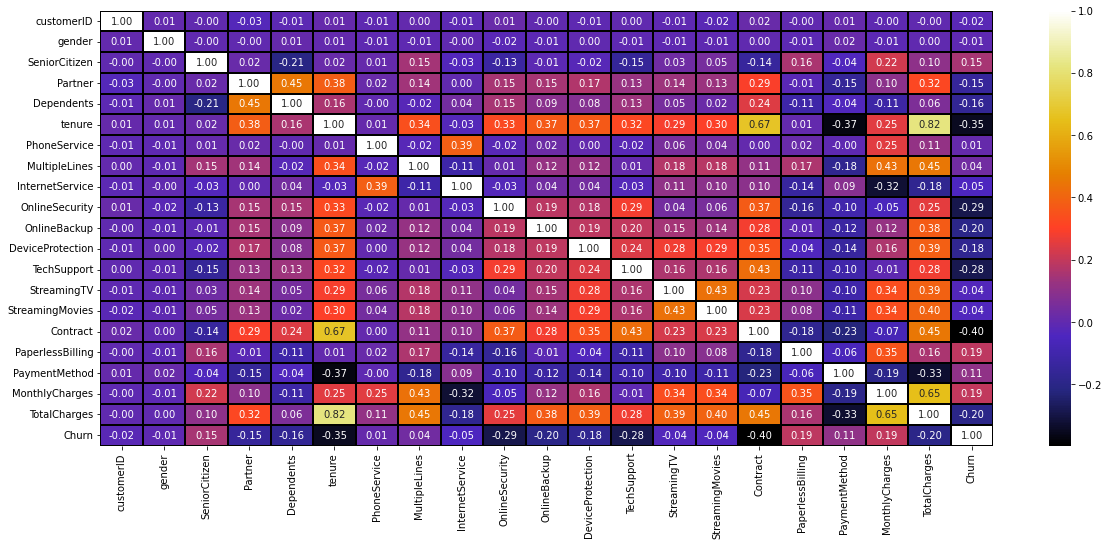

In [133]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

We see that tenure and Total charges are correlated upto 82% ad Total charges has a better impact on the target Churn at -20 compared to Tenure @ -35 lets study further to see the realtionship

Checking the columns which are positively and negatively correlated with the target columns :

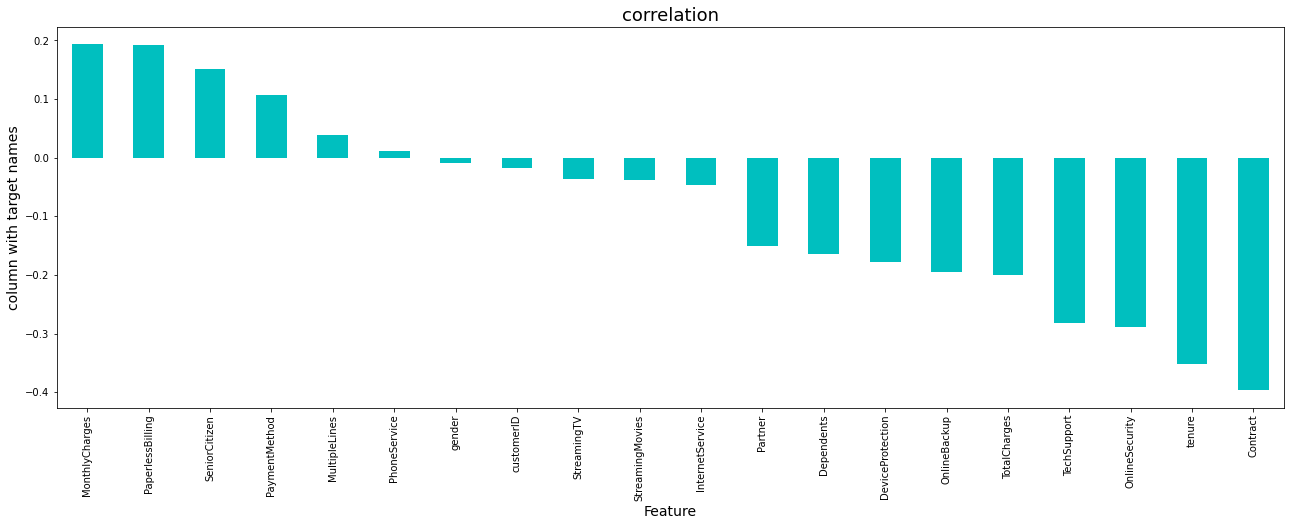

In [134]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Dropping the columns which have multicollinearity problem based on the correaltion as well as index 

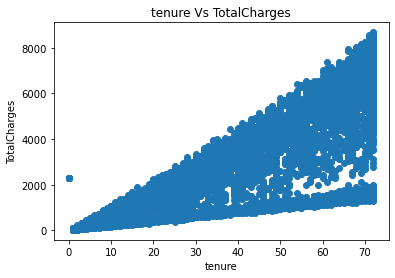

In [135]:
plt.scatter(df.tenure, df.TotalCharges)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('tenure Vs TotalCharges')
plt.show()

We see a significant relationship so we will go ahed and drop the column

In [136]:
df.drop(columns=['customerID','tenure'],inplace=True)

In [137]:
df.shape

(7043, 19)

We have removed both the columns now moving to check for outliers

In [138]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Keeping +/0.5 as the range for skewness, here are the columns which do not lie within that range

Senior-Citizen - categorical

Dependents - categorical

Phone Service-categorical

Contract-categorical

Total Charges - continuos will use transformations techniques to remove outliers

Churn - categorical as well as the target 

Since , no columns has any skewness we will not treat that


# Outliers Check

In [ ]:
#Lets visualize the data
plt.figure(figsize =(50,100))
graph = 1

for column in df:
    if graph <=19: # as there are 9 columns in data
        plt.subplot(7,3,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()
plt.tight_layout()

In [ ]:
#As we are not able to see clearly unlesss we zoom , checking individualy

df['SeniorCitizen'].plot.box()

In [ ]:
df['PhoneService'].plot.box()

In [ ]:
df['TotalCharges'].plot.box()

Since the Senior Citizen is a nominal type of data , we cannot consider its data point as an outlier and we dont see any column with continuos data which has any outliers

# Using SelectKBest Feature Selection Method - Target - Income

Select KBest use f_classif function to find the best features, where f_classif uses Anova Test

In [ ]:
# Again we Divide data into features and label

X = df.drop(columns = ['Churn'])
y = df['Churn']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
best_features = SelectKBest(score_func = f_classif, k=18)

fit = best_features.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(X.columns)


#concatenate dataframes

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_name', 'Score']   #name output columns

print(feature_scores.nlargest(18,'Score'))  #Print Best 4 features

We see that Contract has the best score among the rest and then its online security and tech support , lowest is gender

# Variance Inflation Factor

Checking for Multicollinearity problem to see if one feature is dependent on the other , we need to scale the dat first using MINMAX Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()

In [ ]:
X_scaled = mms.fit_transform(X)

In [ ]:
X_scaled.shape

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#chck Values
vif

We see that all the columns have value less than 5 which is reasonable variation and the max is monthly and total charghes which we will treat with Zscore

We see that contract is high but its a categorical columns so we cant remove it 

# Principal Component Analysis (PCA)

It is a dimension reduction technique and not a feature selection one.

and we are going to apply on the features only , it is mainly used if there are too many features and no correlation with the target

but its the final analysis we are going to do to chcek for multicollinearity problem

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit_transform(X_scaled) #To scale the data with PCA so we can plot the graph to see whats the coverage 

In [ ]:
# lets plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

### We see that in order to cover 95% - 100% of the data we need to have only have 13 features and we can remove the rest , We will use the Kbest to decide which features are the best and see if we should remove any feautes , But at this pont we will move ahead as all the columns constitute to making the model better " we will surely remove the columns incase the model is not doing well due to the curse of dimensionality


# Considering the outlier removal

In [ ]:
df.shape

In [ ]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

In [ ]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

In [ ]:
df_new_z.shape

### Percentage of data loss:

In [ ]:
Data_loss = ((7043-6361)/7043)*100

In [ ]:
Data_loss

We see that the data lost is 9.68% approx and we can consider thei reasonable amount of datato be lost as the model was having outliers

In [ ]:
collist=df_new_z.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new_z[collist[i]],color='green',orient='h')
    plt.tight_layout()

We see that the data does not have any outliers and we can move to the next graph to see the dist plot

In [ ]:
#Lets see how the data is distributed for every column

plt.figure(figsize =(10,20), facecolor = 'white')
plotnumber = 1

for column in df_new_z:
    if plotnumber <=19:
        ax = plt.subplot(7,3,plotnumber)
        sns.distplot(df_new_z[column])
        plt.xlabel(column,fontsize = 12)
        
    plotnumber +=1
plt.tight_layout()

# Over Sampling using SMOTE

In [ ]:
# Again we Divide data into features and label

X = df_new_z.drop(columns = ['Churn'])
y = df_new_z['Churn']

In [ ]:
y.value_counts()

As we see the dataset is imbalanced and we need to treat this or the model will give a good score but will be biased

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,random_state = 322)

In [ ]:
from collections import Counter
Counter(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
sm = SMOTE()

ove_smp = SMOTE()

X_train_ns,y_train_ns= ove_smp.fit_resample(X_train,y_train) # using resample as the sample did not work

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.preprocessing import StandardScaler # scale the data as we have very high values in fnlwgt

scaler = StandardScaler()
X_train_ns = pd.DataFrame(scaler.fit_transform(X_train_ns), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_ns

We have successfully balanced the dataset and also scaled the data to make a model now 

# Creating the Model for  Label-Churn - Choosing the Best Model

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
scores=[]
for i in range(0,100):
    X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = i)
    lr.fit(X_train_ns,y_train_ns)
    pred_train = lr.predict(X_train_ns)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
    print(f"At random state {i},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
    print('\n')
    scores.append(accuracy_score(y_test,pred_test))

In [ ]:
np.argmax(scores)

In [ ]:
scores[np.argmax(scores)]

### We see that this model work well with the data , we see that the scores are the same at Training and testing state almost equal
    
    - we are getting 
     
           At random state 77,the training accuracy is :-0.8020964360587002
                
           At random state 77,the Testing accuracy is :-0.8013827781269641
     
- the training score and Testing score are equal  to each other here
- both the train and test score are really good but we will test more an also th cv score to see if its consistent  


# Train Test Split

In [ ]:
X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 77 ) 

# as the best random state we have chosen is 77

### We are creating a method called Metric to allow us to show the metrics of each classification model we use , so we dont have to code it again 

In [ ]:
#Write one function and call as many times to check accuracy_score of different models

def metric_score(clf,X_train_ns,X_test,y_train_ns,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train_ns)
    
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train_ns,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ##Model Confidence /Accurancy
        

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

### We see the similar scores from the previous , train score is 80.08% and test score is 79.64% and we see the precision score is 74% and f1 score is 72% close to the accuracy score 

In [ ]:
print(confusion_matrix(y_test,pred_test))  

We see a significant no of errors so we will try with other models to see if we can improve this 

# Cross-Validation of the model

In [ ]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

We see very close cv score to the actual test score , we see that cv at 3 is the highest @ 0.7990877389625756 and test score is 0.7963544940289127 which is very close and we can say that the model is not over-fitting or under-fitting

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

X_train_ns,X_test,y_train_ns,y_test = train_test_split(X,y,test_size = 0.25,random_state = 77) #as we have seen a good score on 98th state
dt.fit(X_train_ns,y_train_ns)
pred_train = dt.predict(X_train_ns)
pred_test = dt.predict(X_test)
print(f"At random state {77},the training accuracy is :-{accuracy_score(y_train_ns,pred_train)}")
print(f"At random state {77},the Testing accuracy is :-{accuracy_score(y_test,pred_test)}")
print('\n')


In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(dt,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

In [ ]:
print(confusion_matrix(y_test,pred_test)) 

# Observations from the Decision Tree Classifier :-
    - We see that the training score is boosted all the way to 99.77% which is the highest  but the testing score is fallen shorter than logistic regression  @ 71.59 % which is lesser than the logistic model   , also we see that the F1 score is the lower than  accuracy score @ 63%  
    
    - the model is not performing as good as Logistic regression but we cant use this model moving to check the cv score

In [ ]:
#Cross validation of the model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dt,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {accuracy_score(y_train_ns,pred_train)}and the accuracy for testing is {accuracy_score(y_test,pred_test)}")
    print('\n')

WE are getting close cv scores to the test score but the model is lower @ 71% compared to logistic regression which gave 80%

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train_ns,y_train_ns)
knn.score(X_train_ns,y_train_ns)
pred_decision =knn.predict(X_test)

knns = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',knns*100)

knnscore = cross_val_score(knn,X,y,cv=3)
knnc =knnscore.mean()
print('Cross Val Score :',knnc*100)
print(confusion_matrix(y_test,pred_decision)) 

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(knn,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

# Observations from the KNN Classifier :-
    - We see that the training score is lesser than Logistic regression @ 75.49% and higher than decision tree   
    
    we see that the F1 score is the same  where accuracy for 0 is 84% and for 1 is 48% which is bad and model is biased 
    
    - the CV score is good though and very similar to the test accuracy @ 75% , so overall the model is ok , but we need to improve the f1 score and precision
    
    - we see the confusion matrix where the typ 1 and typ 2 error is horribly very high and we need to test other models 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train_ns,y_train_ns)
rf.score(X_train_ns,y_train_ns)
pred_decision =rf.predict(X_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=5)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)
print(confusion_matrix(y_test,pred_decision)) 

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(rf,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

# Observations from the Random Forest Classifier :-
    - We see that like the decision tree the train score is at the max at 99.77% and we have test score is a little lower at 78% , the F1 score is at 70% and precisiion @ 73% which is again lower,its a good model but logistic seems better , we have imbalance dataset and we treated so we have a little higher Cv score of 79.05% approx so we are getting a good cv score as well which is on par with the test sore which is what we need the model to do 
    
    - the model has same no of errors in the confusion matrix as all the models 

# XgBoost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(X_train_ns,y_train_ns)
xgb.score(X_train_ns,y_train_ns)
pred_decision =xgb.predict(X_test)

xgbs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',xgbs*100)

xgbscore = cross_val_score(xgb,X,y,cv=8)
xgbc =xgbscore.mean()
print('Cross Val Score :',xgbc*100)
print(confusion_matrix(y_test,pred_decision)) 

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(xgb,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

# Observations from the XGboost Classifier :-
    - We see that the training score is lower than the random forest and the decision tree at 95.24% and we see a lower accuracy score for test at 77.37 % which is  lesser than the logistic regression ,we see the F1 score to be lower too @ 69% again higher to rf  the precision score is 71% which is more than the Random forest 
    The CV score is exact same as the accuracy score @ 79% approx which is lower than the logistic regression which had a closer cv to the test score @ 79% approx so overall really good scores from this model and its the 3rd best  till now considering the scores only
    
    Confusion matrix errors are higher compard to the random forest classifier 

# SVC

In [ ]:
from sklearn.svm import SVC

svc= SVC()

svc.fit(X_train_ns,y_train_ns)
svc.score(X_train_ns,y_train_ns)
pred_decision =svc.predict(X_test)

svcs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',svcs*100)

svcscore = cross_val_score(svc,X,y,cv=9)
svcc =svcscore.mean()
print('Cross Val Score :',svcc*100)
print(confusion_matrix(y_test,pred_decision))

In [ ]:
#Call the function and pass dataset to check the train score and the test score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=True) #This is for the Training Score

metric_score(svc,X_train_ns,X_test,y_train_ns,y_test,train=False) #This is for the Testing Score

# Observations from the SVC Classifier :-
    - We see that this model is  performimg worser than all the other models we tested where the train score is 73% and the test is 73% F1 score is less and precioson is 37% whic is less , the cv score is also on the lower side @73%, 
    
    the confusionmatrix is giving lower error and we dont see any predictions for 0 classes in label , so this model is not at all doing well for the dataset

## we can assume that Logistic Regression is the best algorithm for this project as it has the highest scores and least difference between the Cross val score and accuracy but we need to check roc auc to finalize the decision

# Let's check ROC AUC Curve for the fitted Model

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


### How well our model works on training Data

disp = plot_roc_curve(lr,X_train_ns,y_train_ns)

plot_roc_curve(dt,X_train_ns,y_train_ns, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(rf,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(xgb,X_train_ns,y_train_ns, ax= disp.ax_)

plot_roc_curve(svc,X_train_ns,y_train_ns, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

In [ ]:
### How well our model works on Testing Data

disp = plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(dt,X_test,y_test, ax= disp.ax_) #ax_ = Axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax= disp.ax_)

plot_roc_curve(rf,X_test,y_test, ax= disp.ax_)

plot_roc_curve(xgb,X_test,y_test, ax= disp.ax_)

plot_roc_curve(svc,X_test,y_test, ax= disp.ax_)

plt.legend(prop={'size' : 10}, loc='lower right' )

plt.show()

# WE have again proved that we will use the Logistic REgression as the best  model

- The Logistic Regression is only covering 84% of training data and giving 83% of the test data, whereas Random forest classifier is covering 100% of training data and 81% of test data which is the not good .Same with XGBoost may have 100% at train buts its only able to give 81% to test so we will go with Logistic Regression 
- closest to  XGboost classifier model is random forest Classifier but the scores a a little better with Logistic regression
- Logistic regression will be an even better model with Hyperparameter tuning which will increase 

# Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#Creating parameters to pass in RandomizedSearchCV

parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C'       :  np.logspace(-4, 4, 20),
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2000,2500, 5000]
              }


GCV = GridSearchCV(estimator = lr,param_grid=parameters, verbose=2, n_jobs = -1, cv=3, scoring='accuracy')
GCV.fit(X_train_ns,y_train_ns) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearch CV

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty = 'l2' , C = 0.004832930238571752, solver = 'lbfgs',max_iter = 1000)

lr.fit(X_train_ns,y_train_ns)
lr.score(X_train_ns,y_train_ns)
pred_decision =lr.predict(X_test)

lrs = accuracy_score(y_test,pred_decision)
print('Accuracy Score :',lrs*100)

lrscore = cross_val_score(lr,X,y,cv=3)
lrc =lrscore.mean()
print('Cross Val Score :',lrc*100)
print(confusion_matrix(y_test,pred_test)) 

We see that after tuning we are getting a similar score than we got before  , but we also see that the Cv score is come much closer to the  accuracy score @ 80.03% which is great as the closer the score the better the model. let save the lr model in pickle file  

In [ ]:
GCV_pred=GCV.best_estimator_.predict(X_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

In [ ]:
#Plotting distplot to show equillibrium 

sns.distplot(y_test-pred_decision)
plt.show()

In [ ]:
plt.scatter(y_test, pred_decision, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred_test")
plt.show()

We see a normal distribution of the classes which shows that the model is not biased towards any particular class even if the churn rate is so less comapred to the rest

In [ ]:
import pickle
filename = 'Churn_new.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [ ]:
loaded_model = pickle.load(open('Churn_new.pkl','rb'))
result = loaded_model.score(X_test,y_test)
print(result*100)

In [ ]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [ ]:
conclusion

# We have 1591 columns where the model has predicted and Actuals and the model we have chosen is Logistic Regression as the ideal model for this project